# Lot Rakiety

https://qabrio.pl/python-matplotlib-pyplot-jak-generowac-wykresy-2/
strona jak robić wykresy 

In [6]:
from latexifier import latexify
from IPython.display import Latex


***Wstęp.*** 
- Powinien wprowadzać czytelnika w temat projektu oraz zawierać motywacje, cel i znaczenie wykonanej pracy. 
- Notka historyczna jest również bardzo mile widziana.


Celem projektu jest modelowanie toru lotu rakiety batalistycznej. Do modelowania toru ruchu można podejść na wiele sposobów. Dla uproszczenia czasami traktuje się to jako problem dwuwymiarowy, np. w odniesieniu do rakiet taktycznych niewielkiego zasięgu, jednak to rozwiązanie nie uwzględnia m.in kierunku działania linii sił centralnego pola grawitacyjnego, krzywizny Ziemi czy obecności sił pozornych i nie nadaje się do użycia w obronie przeciwrakietowej. [1]\cite{art1}

***Opis zjawiska/podstawy teoretyczne.***
- W tym dziale znajdować się powinny wszystkie potrzebne (techniczne) informacje dotyczące opisywanego tematu. 
- Zawiera on na przykład definicje, z których później korzystamy lub
opis zjawiska fizycznego, które modelujemy.


Rakietę można traktować jako punkt materialny z sześcioma stopniami swobody lub trzema, jeśli zaniedbamy obroty w przestrzeni.    

**z tego pierwszego artykułu**

Możliwe wykorzystanie modelu matematycznego : 
- do wyznaczania parametrów lotu rakiet balistycznych,
- do określania możliwości bojowych rakiet balistycznych, a tym samym szacowania 
stref rażenia i obszarów ryzyka,
- jako generatora danych wejściowych dla algorytmów symulacyjnych śledzenia 
i predykcji trajektorii rakiet balistycznych. [1]

W artykule przedstawiono model matematyczny lotu rakiety balistycznej w centralnym polu grawitacyjnym, opracowany z wykorzystaniem notacji macierzowej.
Model uwzględnia trzy charakterystyczne dla rakiet balistycznych fazy lotu: 
- startową (ang. boost phase), 
- środkową (ang. midcourse phase) i 
- terminalną (ang. terminal phase) 

oraz wpływ oddziaływania atmosfery i sił pozornych na ruch 
rakiet w przestrzeni. (siła odśrodkowa i Coriolisa)

Obliczenia trajektorii lotu rakiety balistycznej prowadzone są w kartezjańskim układzie 
współrzędnych, przedstawionym na rys. 1. Początek tego układu pokrywa się ze środkiem 
Ziemi, oś z skierowana jest do góry i przechodzi przez biegun północny, zaś osie x i y są 
prostopadłe względem siebie i leżą w płaszczyźnie równika, przy czym x przechodzi przez 
południk 0° (Greenwich). Przyjęty układ odniesienia jest układem nieinercjalnym, obraca się 
z prędkością kątową ω względem osi z, co implikuje konieczność uwzględnienia 
w rozważaniach sił: odśrodkowej i Coriolisa. Na potrzeby obliczeń zakłada się ponadto, że 
powierzchnia planety jest idealną sferą, zaś Ziemia charakteryzuje się następującymi 
parametrami fizycznymi: promieniem $R = 6,37·10^6 \ m$, masą $M = 5,97·10^{24}\ kg$ i prędkością obrotową $ω = 7,29·10^{-5} \frac{rad}{s} $. Wartość stałej grawitacyjnej wynosi $G = 6,67·10^{-11} \frac{m^3}{kg \cdot s}$.


W każdej fazie wykorzystywany jest inny model matematyczny.

Poniżej rysunek pomocniczy układu odniesienia na którym będziemy pracować. 

*nie jestem przekonana jak to będzie wyglądać u pana, jeśli prześlemu mu zipa z wszyskimi plikami to POWINNO się normalnie pokazywać ale idk*

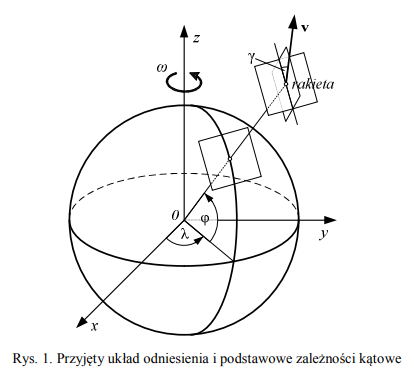

In [9]:
from IPython.display import Image

Image("rys1.png")
# źródło : [1]
#Image("rys1a.png")
# źródło : [2]




In [8]:
from IPython.display import Video
Video("rakieta.mp4")

***Wyniki.***
- Jest to główna część projektu zawierająca obliczenia, rachunki numeryczne oraz analizę danych eksperymentalnych. 
- To, co dokładnie się tu znajdzie, w bardzo dużym stopniu zależy od tematu projektu i pomysłu
autorów.
- Algorytm numeryczny służący do rozwiązywania równania różniczkowego trzeba zaimplementować
samemu.

***Podsumowanie i wnioski.***
- Krótki opis tego, co zostało zrobione i co z tego wynika.

***Literatura.***
- Spis wykorzystanych prac innych autorów. Bibliografia powinna być numerowana z użyciem kwadratowych nawiasów, np. [1]. Każda pozycja musi mieć odnośnik w głównym tekście pracy. Standard bibliograficzny odwołań powinien być jednakowy dla wszystkich pozycji. Można odwoływać się również do stron internetowych, ale zaznaczmy, że Wikipedia nie jest źródłem naukowym. Stanowi ona jednak bardzo dobre źródło odnośników do oryginalnych prac. Polecam również korzystanie z Google Scholar do znajdywania artykułów.


\begin{thebibliography}{11}

    \bibitem{art1} mgr inż. Witold Bużantowicz, "Modelowanie trajektorii lotu rakiety balistycznej w centralnym polu grawitacyjnym"
    \bibitem{SkoczylasZAD} Marian Gewert, Zbigniew Skoczylas "Analiza Matematyczna 2. Przykłady i zadania." Wrocław 2002
\end{thebibliography}

**Bibliografia**

[1] mgr inż. Witold Bużantowicz, "Modelowanie trajektorii lotu rakiety           balistycznej w centralnym polu grawitacyjnym", Wojskowa Akademia Techniczna 

[2]  Benavoli A., Chisci L., Farina A.: Tracking of Ballistic Missile with A-Priori Information, IEEE Transactions on Aerospace and Electronic Systems, Vol. 43, Issue 3, 2007, pp. 1000-1016.

[3]  Cooperman R.L.: Tactical Ballistic Missile Tracking using the Interacting Multiple Model Algorithm, Proc. of the 5th International Conference on Information Fusion, Annapolis, 7-11 July 2002, pp. 824-831.

[4]  Zarchan P.: Tactical and Strategic Missile Guidance, Washington 2012



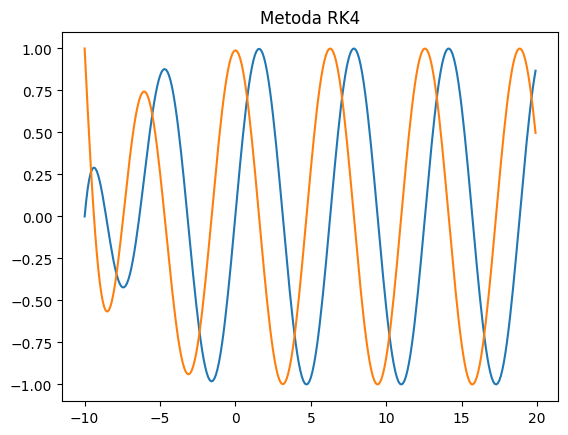

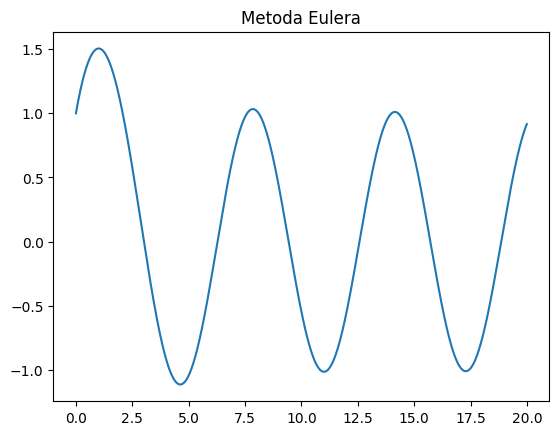

In [4]:
import math

import numpy as np
import pylab as py

def RK4(f, x0, t0, tk, h):
    """Metoda numeryczna Runge-Kutta czwartego rzędu"""
    t = np.arange(t0, tk, h)
    N = len(t)
    if hasattr(x0, "__len__"):
        x = np.zeros((N, len(x0)))
    else:
        x = np.zeros(N)
    x[0] = np.array(x0)
    for i in range(1, N):
        k1 = h * f(t[i-1], x[i-1])
        k2 = h * f(t[i-1] + h*0.5, x[i-1] + 0.5*k1)
        k3 = h * f(t[i-1] + h*0.5, x[i-1] + 0.5*k2)
        k4 = h * f(t[i-1] + h, x[i-1] + k3)
        x[i] = np.array(x[i-1] + (k1 + 2.0*k2 + 2.0*k3 + k4) / 6)
    return t, x

def oscylator(t, y):
    f0 = 1.0
    w0 = 1.0
    Gamma = 1.0
    W = oscylator.W

    x = y[0]
    xdot = y[1]
    return np.array([xdot, f0 * math.cos(W * t) - Gamma * xdot - w0**2 * x])

oscylator.W = 1.0

# Użyj argumentu color, aby ustawić kolor na żółty
py.plot(*RK4(oscylator, [0.0, 1.0], -10.0, 20.0, 0.1))
py.title('Metoda RK4')
py.show()

#metoda Explicit Euler
#f - funkcja f z rownania
#x0-wartosc poczatkowa
#t0-czas poczatkowy
#tk-czas koncowy
#h-krok czasowy

def EE(f,x0,t0,tk,h):
    #generujemy wektor czasow
    t=np.arange(t0,tk,h)

    #liczba krokow czasowych
    N=len(t)

    #wektor wynikowy
    if hasattr(x0, "__len__"): x=np.zeros((N,len(x0))) # gdy mamy do czynienia w równaniem wektorowym
    else: x=np.zeros(N) #dla przypadku skalarnego

    #wpisujemy wartosc poczatkowa
    x[0]=np.array(x0)
    #index
    i=1
    #petla glowna
    while (i<N):
        x[i]=np.array(x[i-1]+h*f(t[i-1],x[i-1]))
        i+=1
    return t,x

oscylator.W = 1.0
t,x=EE(oscylator,[1.0,1.0],0.0,20,0.01)
py.plot(t,x[:,0])
py.title('Metoda Eulera')
py.show()

Na potrzeby symulacji przyjęto uproszczony model rakiety balistycznej, która 
w rozpatrywanym przypadku traktowana jest jako punkt materialny o trzech stopniach swobody (stopnie swobody związane z obrotami w przestrzeni zaniedbuje się). W takim ujęciu przyspieszenie działające na rakietę balistyczną podczas lotu można przedstawić 
w postaci sumy [2, 3, 4]:
$$
 r'' = v' =  a_T + a_C + a_D + a_A 
$$,
gdzie : 

$
r -\text{wektor położenia rakiety balistycznej} \\
v - \text{wektor prędkości rakiety balistycznej} \\
a_T - \text{wektor przyspieszenia związany z ciągiem silnika rakietowego} \\
a_C - \text{wektor przyspieszenia sterującego} \\
a_D - \text{wektor przyspieszenia związany z oporem atmosfery} \\
a_G - \text{wektor przyspieszenia grawitacyjnego} \\
a_G - \text{wektor przyspieszenia pozornego (odśrodkowego i Coriolisa)} 
$ 

[1]